In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import mysql.connector

In [2]:
sales_df = pd.read_csv('raw_data/Sales.csv')
stores_df = pd.read_csv('raw_data/Stores.csv')
products_df = pd.read_csv('raw_data/Products.csv')
customers_df = pd.read_csv('raw_data/Customers.csv', encoding ="ISO-8859-1")
exchange_df = pd.read_csv('raw_data/Exchange_Rates.csv')

In [3]:
customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [4]:
#data_conversion
customers_df["Birthday"] = pd.to_datetime(customers_df['Birthday'], format="%m/%d/%Y", errors='coerce').dt.date

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [6]:
#checking the missing values
customers_df.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [7]:
customers_df['State Code']=customers_df['State Code'].fillna('NPO')

In [8]:
customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19


In [9]:
customers_df.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [10]:
#creating column age using datetime

today = datetime.today()
customers_df["Age"] =customers_df["Birthday"].apply(
    lambda x:today.year - x.year-((today.month,today.day)<(x.month,x.day)))

In [11]:
customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,58


In [12]:
customers_df.describe()

,CustomerKey,Age
count,1.526600e+04,15266.000000
mean,1.060508e+06,55.568125
std,6.127097e+05,19.323752
min,3.010000e+02,22.000000
25%,5.140335e+05,39.000000
50%,1.079244e+06,56.000000
75%,1.593980e+06,72.000000
max,2.099937e+06,89.000000


In [13]:
#grouping
data=customers_df[["CustomerKey","Country"]].groupby(["Country"]).count()
data

,CustomerKey
Country,
Australia,1420
Canada,1553
France,670
Germany,1473
Italy,645
Netherlands,733
United Kingdom,1944
United States,6828


C:\Users\deepa\AppData\Local\Temp\ipykernel_24832\2662359664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x="Country",y="CustomerKey",palette='summer')


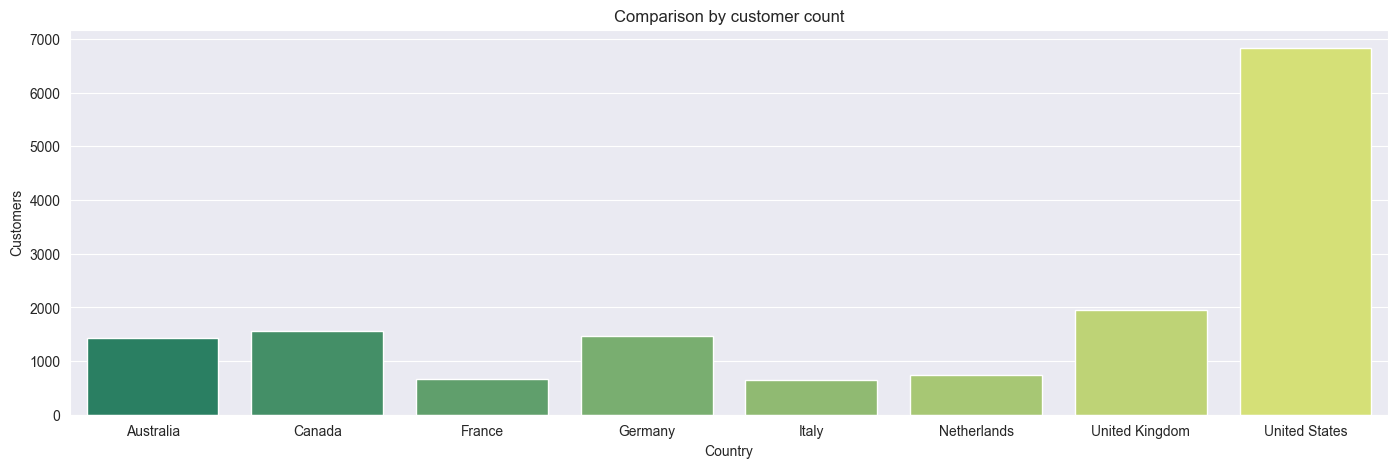

In [14]:
plt.figure(figsize=(17,5))
sns.set_style("darkgrid")
sns.barplot(data=data,x="Country",y="CustomerKey",palette='summer')
plt.ylabel("Customers")
plt.title("Comparison by customer count")
plt.show()

In [15]:
#add new feature/column age group : middle-age , senior-citizen , adult , teen
def age_group(age):
    if age <= 19:
        return "Teen"
    elif age >= 20 and age<= 35:
        return "Adult"
    elif age >= 36 and age<= 60:
        return "Middle-Aged"
    else:
        return "Senior-citizen"

customers_df["AgeGroup"] = customers_df["Age"].apply(age_group)

In [16]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15266 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
 10  Age          15266 non-null  int64 
 11  AgeGroup     15266 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.4+ MB


In [17]:
customers_df["Country"].value_counts()

Country
United States     6828
United Kingdom    1944
Canada            1553
Germany           1473
Australia         1420
Netherlands        733
France             670
Italy              645
Name: count, dtype: int64

In [18]:
data_group=customers_df[["AgeGroup","Country","Age"]].groupby(["Country","AgeGroup"]).count()
data_group

Age
Country        AgeGroup            
Australia      Adult            264
               Middle-Aged      548
               Senior-citizen   608
Canada         Adult            310
               Middle-Aged      575
               Senior-citizen   668
France         Adult            127
               Middle-Aged      236
               Senior-citizen   307
Germany        Adult            277
               Middle-Aged      574
               Senior-citizen   622
Italy          Adult            134
               Middle-Aged      243
               Senior-citizen   268
Netherlands    Adult            142
               Middle-Aged      272
               Senior-citizen   319
United Kingdom Adult            412
               Middle-Aged      701
               Senior-citizen   831
United States  Adult           1390
               Middle-Aged     2536
               Senior-citizen  2902

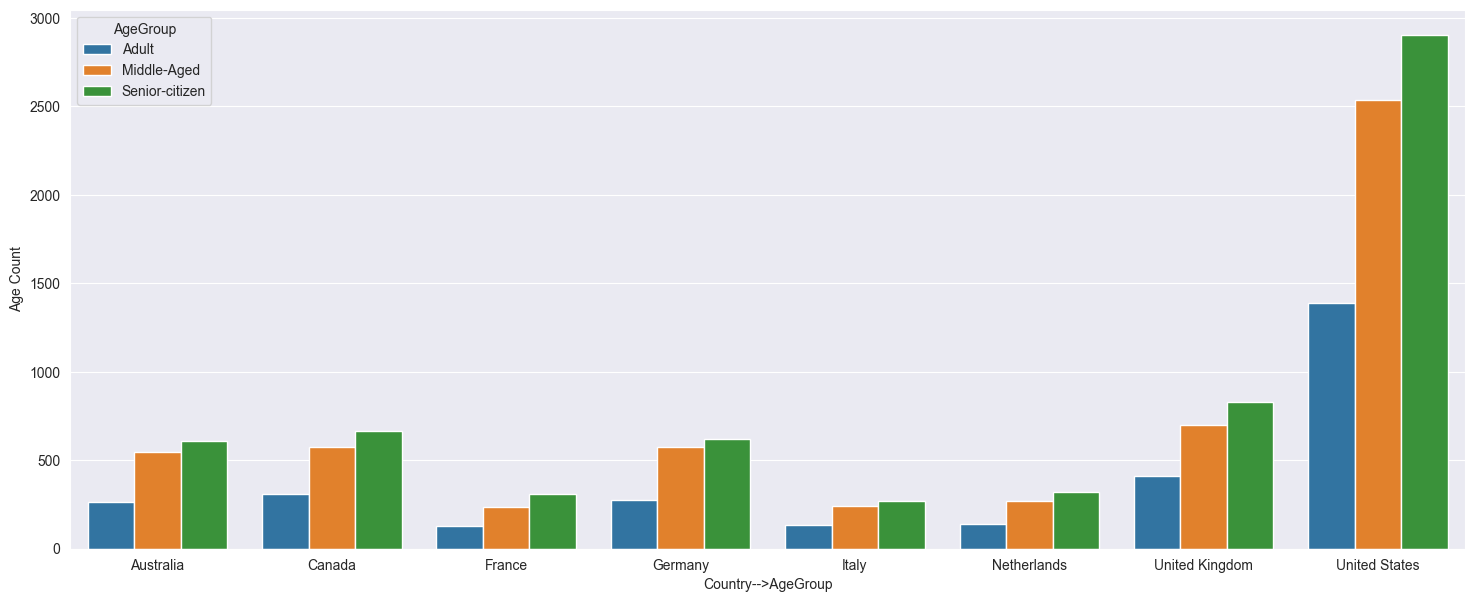

In [19]:
plt.figure(figsize=(18,7))
sns.set_style("darkgrid")
sns.barplot(data=data_group,x="Country",y="Age",hue="AgeGroup")
plt.ylabel("Age Count")
plt.xlabel("Country-->AgeGroup")
plt.show()

In [20]:
exchange_df.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [21]:
exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [22]:
exchange_df.rename(columns={"Currency":"CurrencyCode"},inplace=True)

In [23]:
exchange_df["Date"]=pd.to_datetime(exchange_df["Date"], format="%m/%d/%Y", errors='coerce').dt.date
exchange_df.head()

,Date,CurrencyCode,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415


In [24]:
exchange_df["Exchange"] =exchange_df["Exchange"].round(2)
exchange_df.head()

,Date,CurrencyCode,Exchange
0,2015-01-01,USD,1.00
1,2015-01-01,CAD,1.16
2,2015-01-01,AUD,1.22
3,2015-01-01,EUR,0.82
4,2015-01-01,GBP,0.64


In [25]:
#checking missing values
exchange_df.isnull().sum()

Date            0
CurrencyCode    0
Exchange        0
dtype: int64

C:\Users\deepa\AppData\Local\Temp\ipykernel_24832\3270429692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=exchange_df,x="CurrencyCode",y="Exchange",palette='ocean')


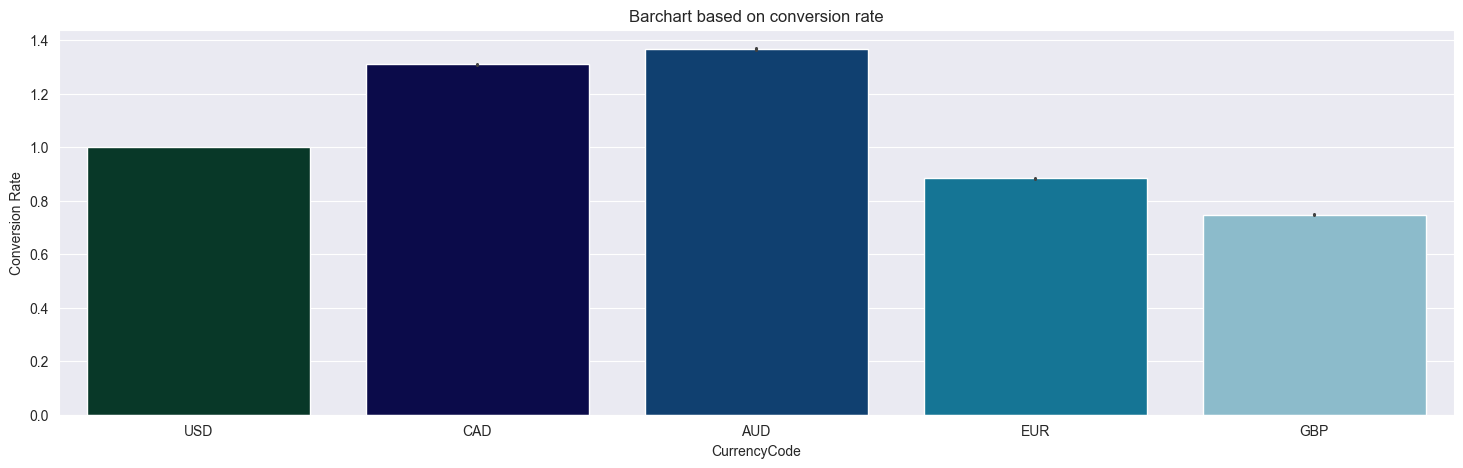

In [26]:
plt.figure(figsize=(18,5))
sns.barplot(data=exchange_df,x="CurrencyCode",y="Exchange",palette='ocean')
plt.ylabel("Conversion Rate")
plt.title("Barchart based on conversion rate")
plt.show()

In [27]:
products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [28]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [29]:
#checking for missing values
products_df.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [30]:
products_df["Unit Cost USD"] = products_df["Unit Cost USD"].str.replace("$","").str.replace(",","")
products_df["Unit Cost USD"] =products_df["Unit Cost USD"].astype(float)
products_df["Unit Price USD"] = products_df["Unit Price USD"].str.replace("$","").str.replace(",","")
products_df["Unit Price USD"] =products_df["Unit Price USD"].astype(float)
products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [31]:
category=products_df[["Category","CategoryKey"]]
category_details_1=category.drop_duplicates().reset_index()
category_details_1

,index,Category,CategoryKey
0,0,Audio,1
1,115,TV and Video,2
2,337,Computers,3
3,943,Cameras and camcorders,4
4,1315,Cell phones,5
5,1570,"Music, Movies and Audio Books",6
6,1660,Games and Toys,7
7,1826,Home Appliances,8


In [32]:
category_details_1.drop(["index"],axis=1,inplace=True)
category_details_1

,Category,CategoryKey
0,Audio,1
1,TV and Video,2
2,Computers,3
3,Cameras and camcorders,4
4,Cell phones,5
5,"Music, Movies and Audio Books",6
6,Games and Toys,7
7,Home Appliances,8


In [33]:
category_details =products_df.groupby("Category").size().reset_index(name="Category_Count")
category_details

,Category,Category_Count
0,Audio,115
1,Cameras and camcorders,372
2,Cell phones,285
3,Computers,606
4,Games and Toys,166
5,Home Appliances,661
6,"Music, Movies and Audio Books",90
7,TV and Video,222


In [34]:
merged_category_details= pd.merge(category_details_1,category_details,on="Category",how="inner")
merged_category_details

,Category,CategoryKey,Category_Count
0,Audio,1,115
1,TV and Video,2,222
2,Computers,3,606
3,Cameras and camcorders,4,372
4,Cell phones,5,285
5,"Music, Movies and Audio Books",6,90
6,Games and Toys,7,166
7,Home Appliances,8,661


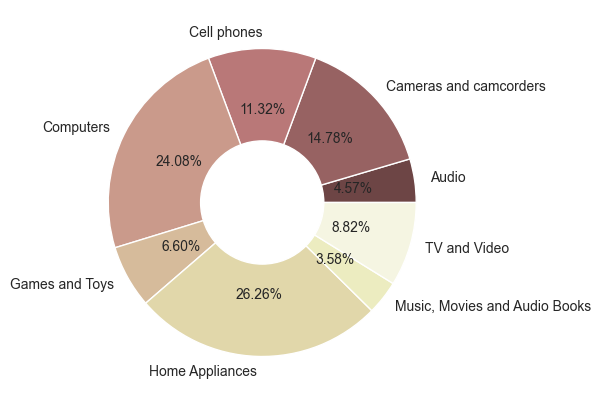

In [35]:
plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
plt.pie(category_details["Category_Count"],labels=category_details["Category"],autopct="%1.2f%%",colors=sns.color_palette("pink", len(category_details)))
circle=plt.Circle((0,0),0.40,fc="white")
donut=plt.gcf()
donut.gca().add_artist(circle)
plt.show()

In [36]:
sub_categories = products_df.groupby(["SubcategoryKey","Subcategory","CategoryKey"]).size().reset_index(name="Subcategory_Count")
sub_categories

,SubcategoryKey,Subcategory,CategoryKey,Subcategory_Count
0,101,MP4&MP3,1,45
1,104,Recording Pen,1,20
2,106,Bluetooth Headphones,1,50
3,201,Televisions,2,50
4,202,VCD & DVD,2,26
5,203,Home Theater System,2,100
6,205,Car Video,2,46
7,301,Laptops,3,78
8,303,Desktops,3,45
9,304,Monitors,3,78


C:\Users\deepa\AppData\Local\Temp\ipykernel_24832\1879781508.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_categories,x="Subcategory",y="Subcategory_Count",palette=np.array(pal)[rank])
C:\Users\deepa\AppData\Local\Temp\ipykernel_24832\1879781508.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=sub_categories,x="Subcategory",y="Subcategory_Count",palette=np.array(pal)[rank])


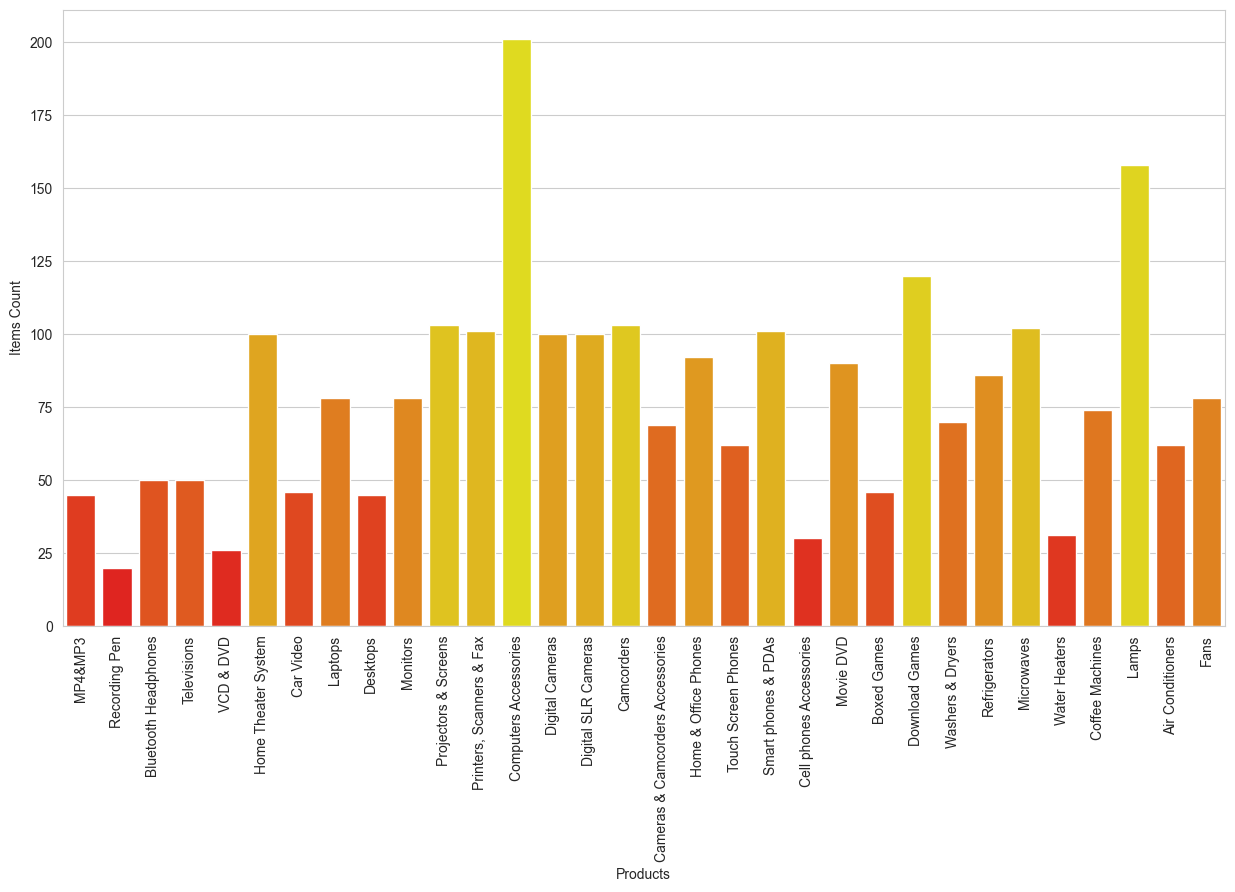

In [37]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
plt.xticks(rotation=90)
pal = sns.color_palette(palette='autumn', n_colors=len(sub_categories))
norm = sub_categories['Subcategory_Count'] / sub_categories['Subcategory_Count'].max()
rank = norm.argsort().argsort()
sns.barplot(data=sub_categories,x="Subcategory",y="Subcategory_Count",palette=np.array(pal)[rank])
plt.xlabel("Products")
plt.ylabel("Items Count")
plt.show()

In [38]:
products =pd.merge(merged_category_details,sub_categories,on="CategoryKey",how="inner")
products

,Category,CategoryKey,Category_Count,SubcategoryKey,Subcategory,Subcategory_Count
0,Audio,1,115,101,MP4&MP3,45
1,Audio,1,115,104,Recording Pen,20
2,Audio,1,115,106,Bluetooth Headphones,50
3,TV and Video,2,222,201,Televisions,50
4,TV and Video,2,222,202,VCD & DVD,26
5,TV and Video,2,222,203,Home Theater System,100
6,TV and Video,2,222,205,Car Video,46
7,Computers,3,606,301,Laptops,78
8,Computers,3,606,303,Desktops,45
9,Computers,3,606,304,Monitors,78


In [39]:
pd.set_option('display.max_colwidth', None)
product_categories=products[["Category","Subcategory"]].groupby("Category").agg(list).reset_index()
product_categories

,Category,Subcategory
0,Audio,"[MP4&MP3, Recording Pen, Bluetooth Headphones]"
1,Cameras and camcorders,"[Digital Cameras, Digital SLR Cameras, Camcorders, Cameras & Camcorders Accessories]"
2,Cell phones,"[Home & Office Phones, Touch Screen Phones, Smart phones & PDAs, Cell phones Accessories]"
3,Computers,"[Laptops, Desktops, Monitors, Projectors & Screens, Printers, Scanners & Fax, Computers Accessories]"
4,Games and Toys,"[Boxed Games, Download Games]"
5,Home Appliances,"[Washers & Dryers, Refrigerators, Microwaves, Water Heaters, Coffee Machines, Lamps, Air Conditioners, Fans]"
6,"Music, Movies and Audio Books",[Movie DVD]
7,TV and Video,"[Televisions, VCD & DVD, Home Theater System, Car Video]"


In [40]:
products = pd.DataFrame(products)
reordered=["Category","Category_Count","CategoryKey","Subcategory","Subcategory_Count","SubcategoryKey" ]
df_products=products[reordered]
df_products

,Category,Category_Count,CategoryKey,Subcategory,Subcategory_Count,SubcategoryKey
0,Audio,115,1,MP4&MP3,45,101
1,Audio,115,1,Recording Pen,20,104
2,Audio,115,1,Bluetooth Headphones,50,106
3,TV and Video,222,2,Televisions,50,201
4,TV and Video,222,2,VCD & DVD,26,202
5,TV and Video,222,2,Home Theater System,100,203
6,TV and Video,222,2,Car Video,46,205
7,Computers,606,3,Laptops,78,301
8,Computers,606,3,Desktops,45,303
9,Computers,606,3,Monitors,78,304


In [41]:
category=df_products.groupby(["Category","Subcategory","Subcategory_Count"]).count()
category.drop(["Category_Count","CategoryKey","SubcategoryKey"],axis=1,inplace=True)
category

Empty DataFrame
Columns: []
Index: [(Audio, Bluetooth Headphones, 50), (Audio, MP4&MP3, 45), (Audio, Recording Pen, 20), (Cameras and camcorders, Camcorders, 103), (Cameras and camcorders, Cameras & Camcorders Accessories, 69), (Cameras and camcorders, Digital Cameras, 100), (Cameras and camcorders, Digital SLR Cameras, 100), (Cell phones, Cell phones Accessories, 30), (Cell phones, Home & Office Phones, 92), (Cell phones, Smart phones & PDAs, 101), (Cell phones, Touch Screen Phones, 62), (Computers, Computers Accessories, 201), (Computers, Desktops, 45), (Computers, Laptops, 78), (Computers, Monitors, 78), (Computers, Printers, Scanners & Fax, 101), (Computers, Projectors & Screens, 103), (Games and Toys, Boxed Games, 46), (Games and Toys, Download Games, 120), (Home Appliances, Air Conditioners, 62), (Home Appliances, Coffee Machines, 74), (Home Appliances, Fans, 78), (Home Appliances, Lamps, 158), (Home Appliances, Microwaves, 102), (Home Appliances, Refrigerators, 86), (Home Appliances, Washers & Dryers, 70), (Home Appliances, Water Heaters, 31), (Music, Movies and Audio Books, Movie DVD, 90), (TV and Video, Car Video, 46), (TV and Video, Home Theater System, 100), (TV and Video, Televisions, 50), (TV and Video, VCD & DVD, 26)]

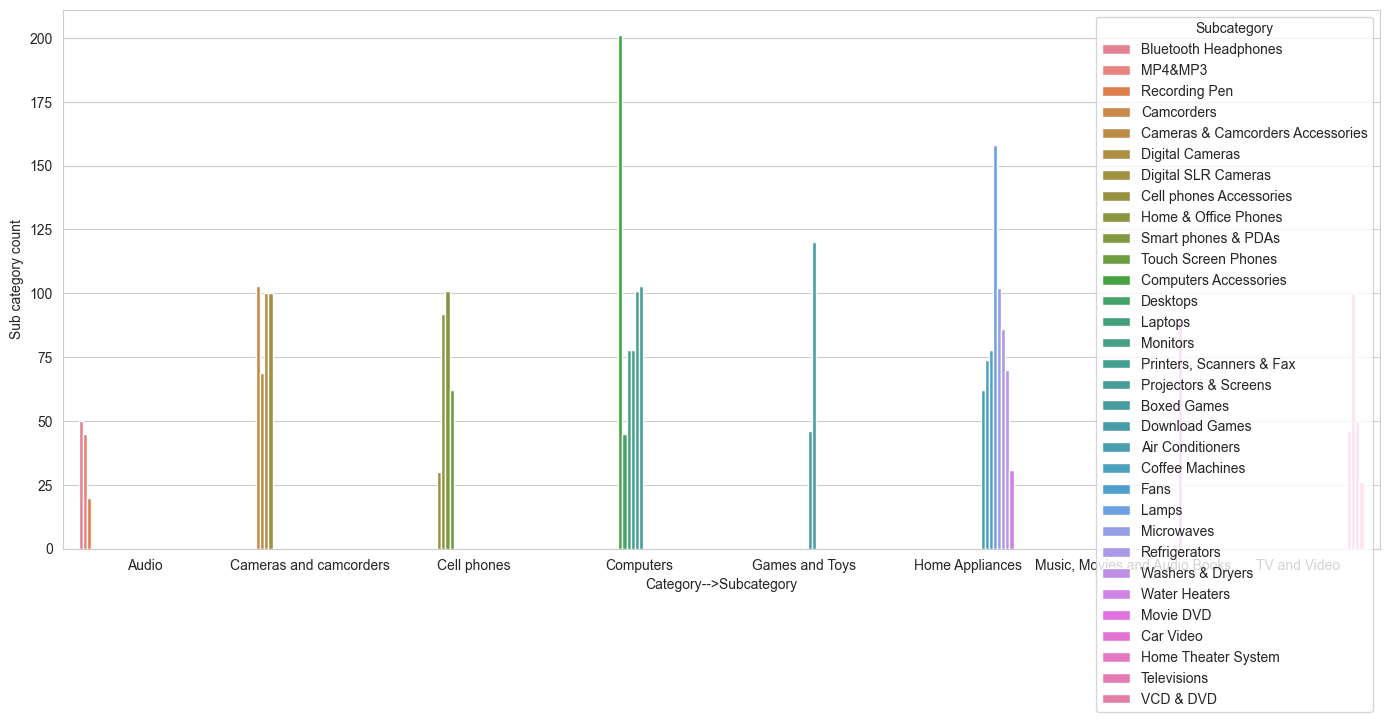

In [42]:
plt.figure(figsize=(17,7))
sns.set_style("whitegrid")
sns.barplot(data=category,x="Category",y="Subcategory_Count",hue="Subcategory")
plt.ylabel("Sub category count")
plt.xlabel("Category-->Subcategory")
plt.show()

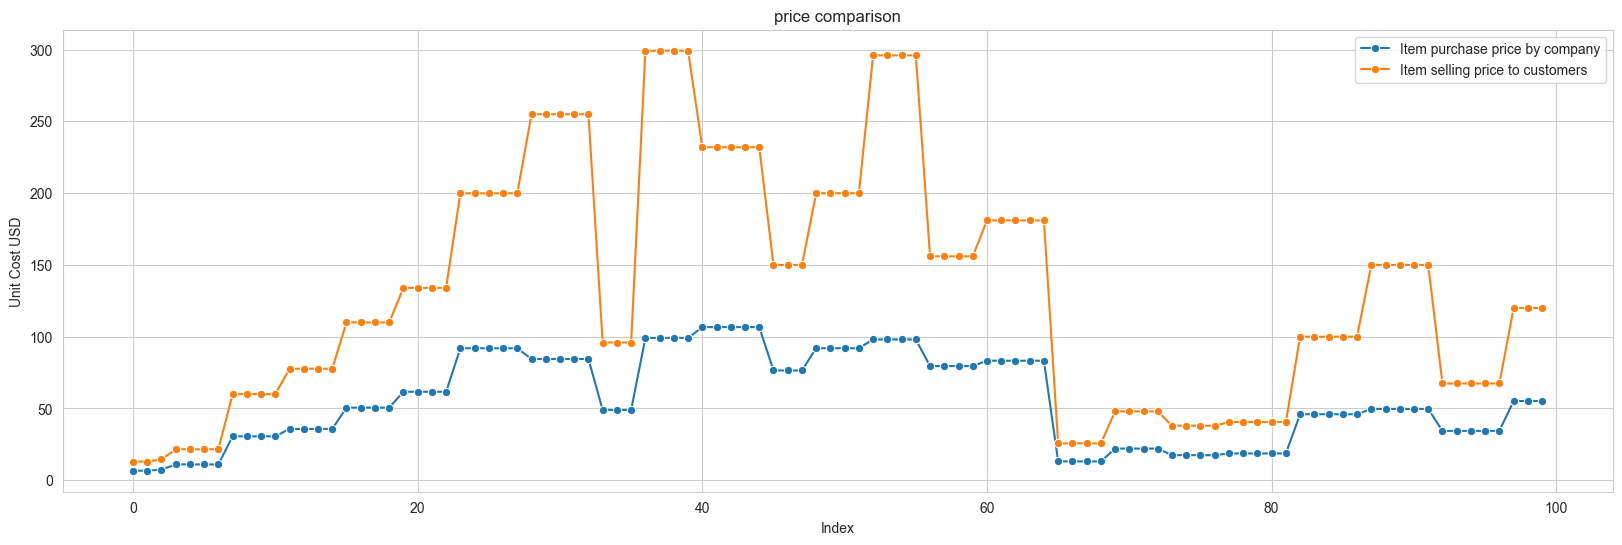

In [43]:
df= products_df.head(100)
plt.figure(figsize=(20,6))
sns.lineplot(data=df,x=df.index,y="Unit Cost USD",marker="o",label="Item purchase price by company")
sns.lineplot(data=df,x=df.index,y="Unit Price USD",marker="o",label="Item selling price to customers")
plt.xlabel("Index")
plt.title("price comparison")
plt.show()

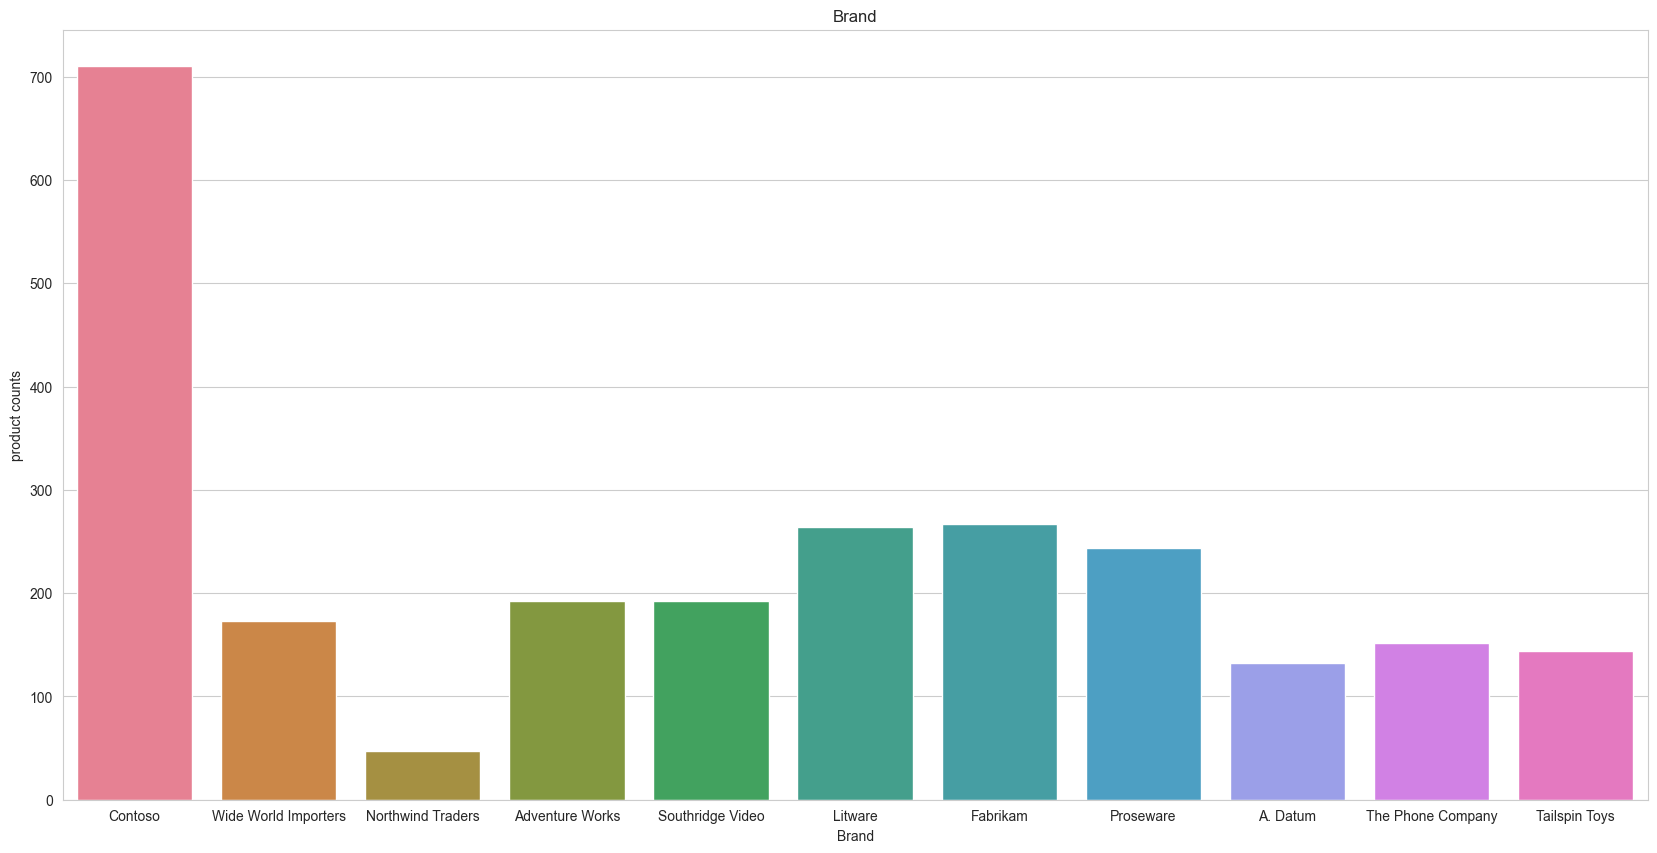

In [44]:
plt.figure(figsize=(45,10))
plt.subplot(1,2,1)
sns.countplot(data=products_df,x=products_df["Brand"],hue="Brand")
plt.xlabel("Brand")
plt.ylabel("product counts")
plt.title("Brand")
plt.show()

In [45]:
sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [46]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [47]:
sales_df["Order Date"] = pd.to_datetime(sales_df["Order Date"],format= "%m/%d/%Y", errors="coerce").dt.date 
sales_df["Delivery Date"] = pd.to_datetime(sales_df["Delivery Date"],format= "%m/%d/%Y", errors="coerce").dt.date 
sales_df.isnull().mean()*100

Order Number      0.000000
Line Item         0.000000
Order Date        0.000000
Delivery Date    79.064627
CustomerKey       0.000000
StoreKey          0.000000
ProductKey        0.000000
Quantity          0.000000
Currency Code     0.000000
dtype: float64

In [48]:
sales_df["Delivery Date"] = sales_df["Delivery Date"].fillna(sales_df["Order Date"]+ pd.Timedelta(days=7))
sales_df.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

In [49]:
sales_df[["CustomerKey","StoreKey"]].drop_duplicates().count().reset_index(name="Count")

,index,Count
0,CustomerKey,22457
1,StoreKey,22457


In [50]:
order_frequency=sales_df.groupby(['StoreKey', 'CustomerKey'])['Order Number'].nunique().reset_index()
maximum_order=sales_df.groupby(['StoreKey', 'CustomerKey'])['Quantity'].sum().reset_index()
merged_value=pd.merge(order_frequency,maximum_order,on=["CustomerKey","StoreKey"])
total_sales=merged_value.sort_values(['StoreKey', 'Quantity'], ascending=[True,False])
total_sales.head()

,StoreKey,CustomerKey,Order Number,Quantity
4057,0,1920128,6,65
3256,0,1598675,3,62
818,0,461982,3,53
2747,0,1414525,6,51
2917,0,1473522,3,49


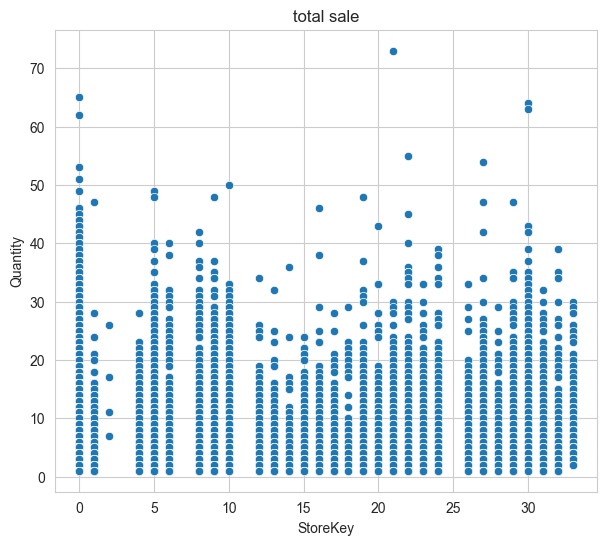

In [51]:
total_sales_df=total_sales.head(10000)
plt.figure(figsize=(7,6))
sns.scatterplot(data=total_sales_df,x="StoreKey",y="Quantity")
plt.title("total sale")
plt.show()

In [52]:
stores_df

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [53]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [54]:
stores_df["Open Date"] = pd.to_datetime(stores_df["Open Date"], format="%m/%d/%Y", errors='coerce').dt.date
stores_df.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [55]:
stores_df = stores_df.replace({np.nan: 0})
stores_df.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

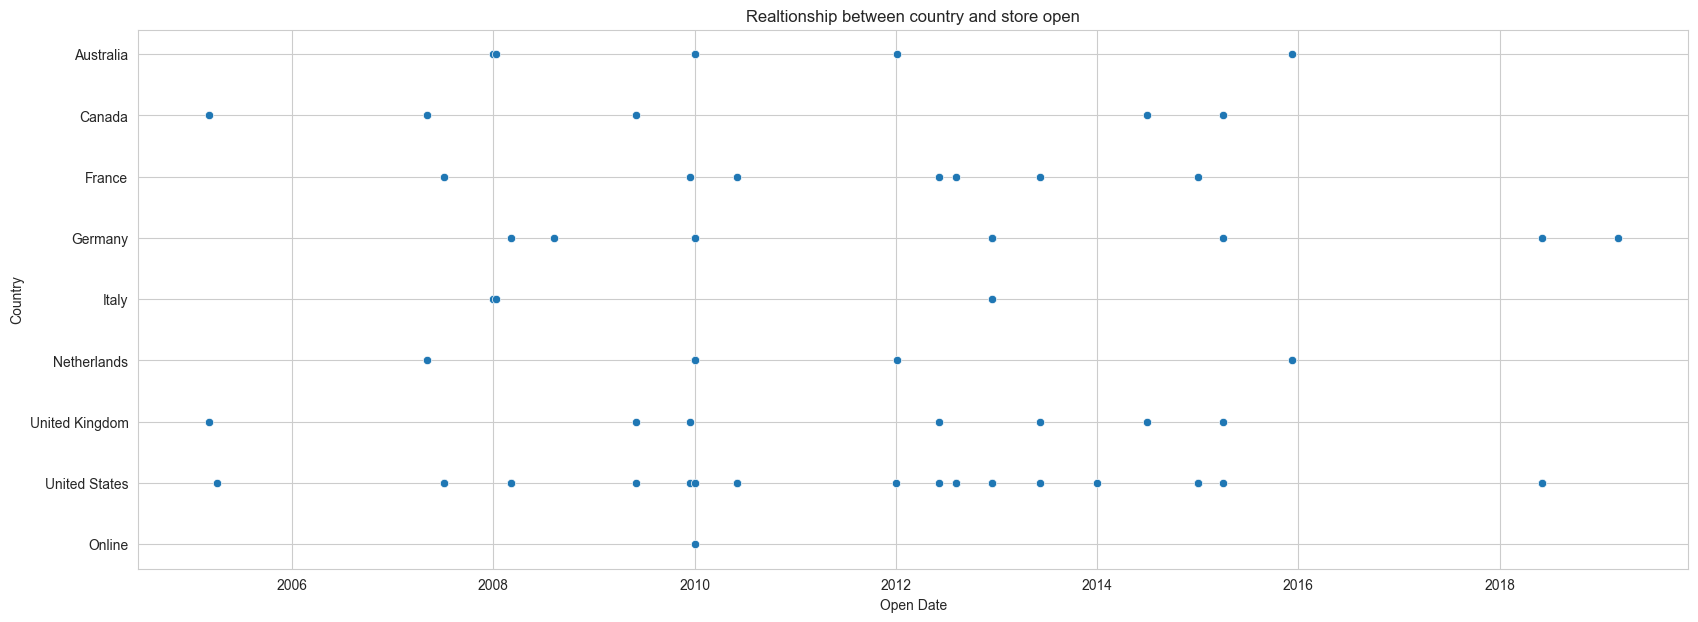

In [56]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=stores_df,x="Open Date",y="Country")
plt.title("Realtionship between country and store open")
plt.show()

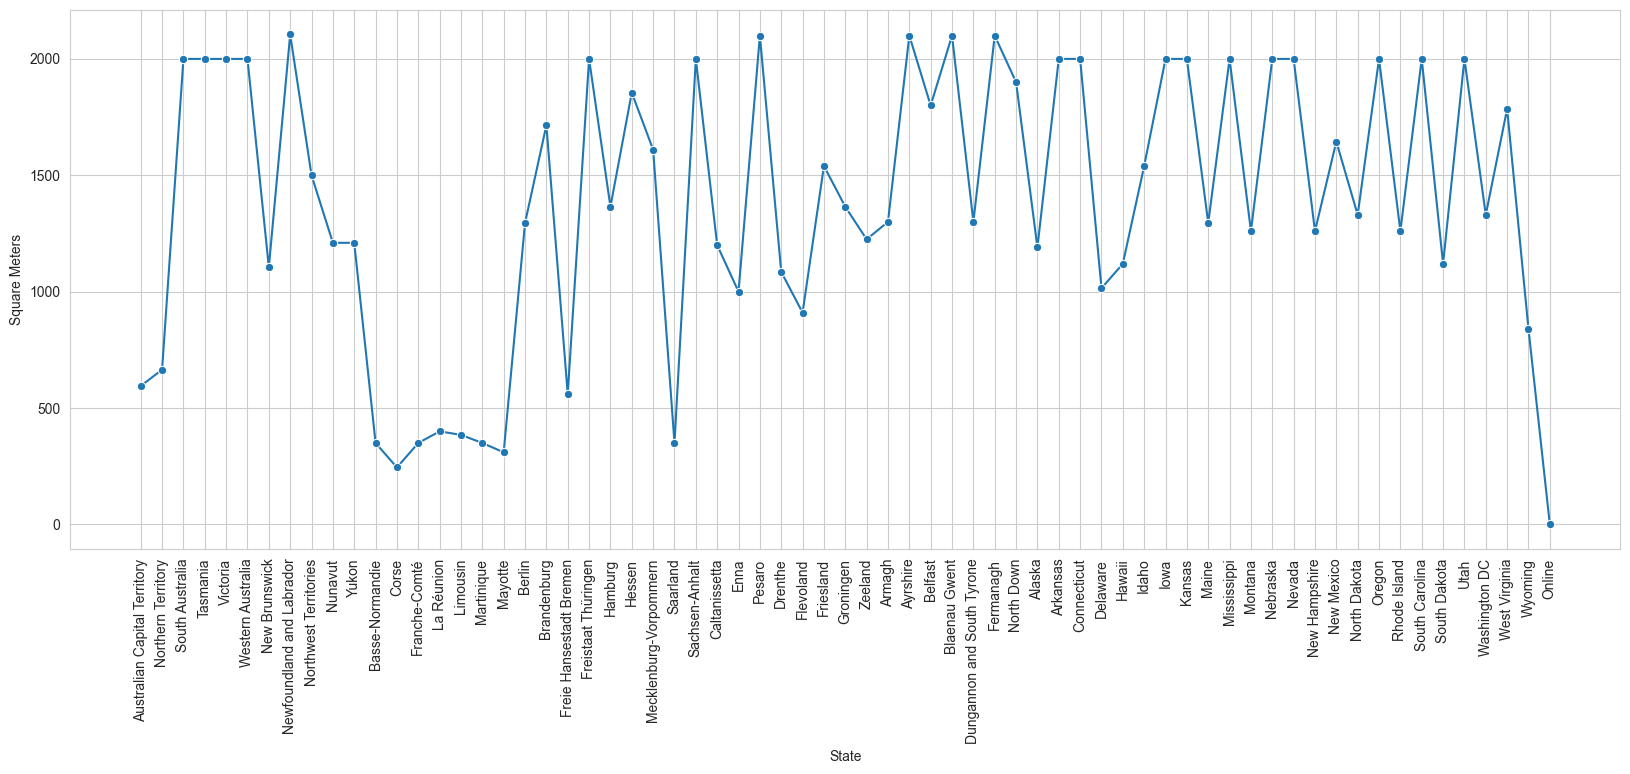

In [57]:
plt.figure(figsize=(20,7))
sns.lineplot(data=stores_df,x="State",y="Square Meters",marker="o")
plt.xticks(rotation=90)
plt.show()

In [58]:
stores_df.index

RangeIndex(start=0, stop=67, step=1)

In [59]:
store_group=stores_df[["Country","State"]].groupby(["Country"]).count()
store_group

,State
Country,
Australia,6
Canada,5
France,7
Germany,9
Italy,3
Netherlands,5
Online,1
United Kingdom,7
United States,24


In [65]:
conn=mysql.connector.connect(
    host="localhost", 
    user="root", 
    password="simple",)
    
my_cursor = conn.cursor()

In [66]:
my_cursor.execute("CREATE DATABASE IF NOT EXISTS sales_records")
conn.database = 'sales_records'

In [67]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS customer_records(
                  CustomerKey INT,
                  Gender VARCHAR(255),
                  Name VARCHAR(255),
                  City VARCHAR(255),
                  State_Code VARCHAR(255),
                  State VARCHAR(255),
                  Zip_Code VARCHAR(255),
                  Country VARCHAR(255),
                  Continent VARCHAR(255),
                  Birthday VARCHAR(255),
                  Age INT,
                  AgeGroup VARCHAR(255)
                  )''')
print("created successful")

created successful


In [68]:
insert_values='''INSERT INTO customer_records(
                  CustomerKey,
                  Gender,
                  Name,
                  City,
                  State_Code,
                  State,
                  Zip_Code,
                  Country,
                  Continent,
                  Birthday,
                  Age,
                  AgeGroup)
                  VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'''

In [69]:
for index, row in customers_df.iterrows():
    my_cursor.execute(insert_values, (
            row['CustomerKey'],
            row['Gender'],
            row['Name'],
            row['City'],
            row['State Code'],
            row['State'],
            row['Zip Code'],
            row['Country'],
            row['Continent'],
            row['Birthday'],
            row['Age'],
            row['AgeGroup']
        ))
    
conn.commit()

In [70]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS exchange_records(
                  Date VARCHAR(255),
                  CurrencyCode VARCHAR(255),
                  Exchange FLOAT
                  )''')
print("Table Created successfully")

Table Created successfully


In [71]:
insert_values ='''INSERT INTO exchange_records(
                  Date,
                 CurrencyCode,
                  Exchange)
                  VALUES (%s, %s, %s)'''

In [72]:
for index,row in exchange_df.iterrows():
    my_cursor.execute(insert_values,((row['Date'],
                           row['CurrencyCode'],
                           row['Exchange'],
                           ))
                    )
conn.commit()
print("successfully")

successfully


In [73]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS product_records(
                  ProductKey INT,
                  Product_Name VARCHAR(255),
                  Brand VARCHAR(255),
                  Color VARCHAR(255),
                  Unit_Cost_USD FLOAT,
                  Unit_Price_USD FLOAT,
                  SubcategoryKey INT,
                  Subcategory VARCHAR(255),
                  CategoryKey INT,
                  Category VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [74]:
insert_values ='''INSERT INTO product_records(
                  ProductKey,
                  Product_Name,
                  Brand,
                  Color,
                  Unit_Cost_USD,
                  Unit_Price_USD,
                  SubcategoryKey,
                  Subcategory,
                  CategoryKey,
                  Category)
                  VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'''

In [75]:
for index,row in products_df.iterrows():
    my_cursor.execute(insert_values,((row['ProductKey'],
                           row['Product Name'],
                           row['Brand'],
                           row['Color'],
                           row['Unit Cost USD'],
                           row['Unit Price USD'],
                           row['SubcategoryKey'],
                           row['Subcategory'],
                           row['CategoryKey'],
                           row['Category']))
                    )
conn.commit()

In [76]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS sales_records(
                  Order_Number INT,
                  Line_Item INT,
                  Order_Date VARCHAR(255),
                  Delivery_Date VARCHAR(255),
                  CustomerKey INT,
                  StoreKey INT,
                  ProductKey INT,
                  Quantity INT,
                  Currency_Code VARCHAR(255)
                  )''')
print("successfully")

successfully


In [77]:
insert_values ='''INSERT INTO sales_records(
                  Order_Number,
                  Line_Item,
                  Order_Date,
                  Delivery_Date,
                  CustomerKey,
                  StoreKey,
                  ProductKey,
                  Quantity,
                  Currency_Code)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s)'''

In [78]:
for index,row in sales_df.iterrows():
    my_cursor.execute(insert_values,((row['Order Number'],
                           row['Line Item'],
                           row['Order Date'],
                           row['Delivery Date'],           
                           row['CustomerKey'],
                           row['StoreKey'],
                           row['ProductKey'],
                           row['Quantity'],
                           row['Currency Code']))
                    )
conn.commit()
print("successful")

successful


In [80]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS stores_records(
                  StoreKey INT,
                  Country VARCHAR(255),
                  State VARCHAR(255),
                  Square_Meters FLOAT,
                  Open_Date VARCHAR(255)
                  )''')
print("successfully")

successfully


In [81]:
insert_values ='''INSERT INTO stores_records(
                  StoreKey,
                  Country,
                  State,
                  Square_Meters,
                  Open_Date)
                  VALUES (%s, %s, %s, %s, %s)'''

In [82]:
for index,row in stores_df.iterrows():
    my_cursor.execute(insert_values,((row['StoreKey'],
                           row['Country'],
                           row['State'],
                           row['Square Meters'],
                           row['Open Date']
                           ))
                    )
conn.commit()
print("successful") 

successful
